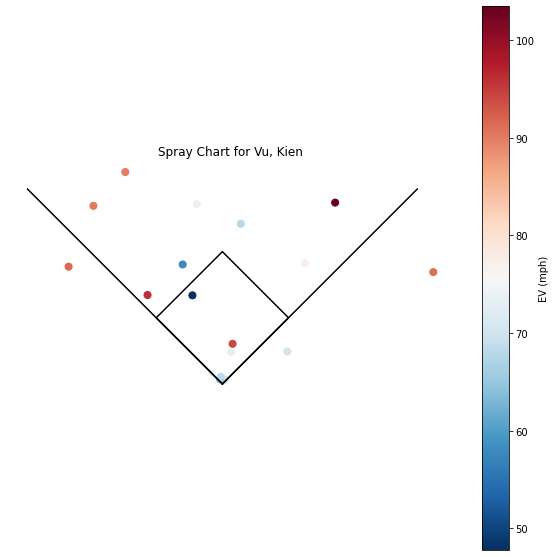

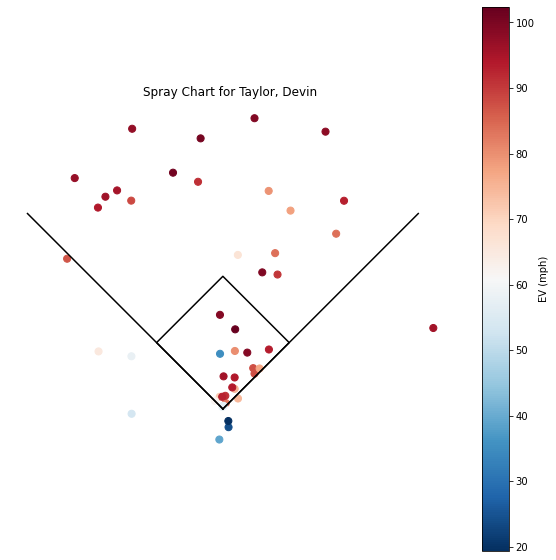

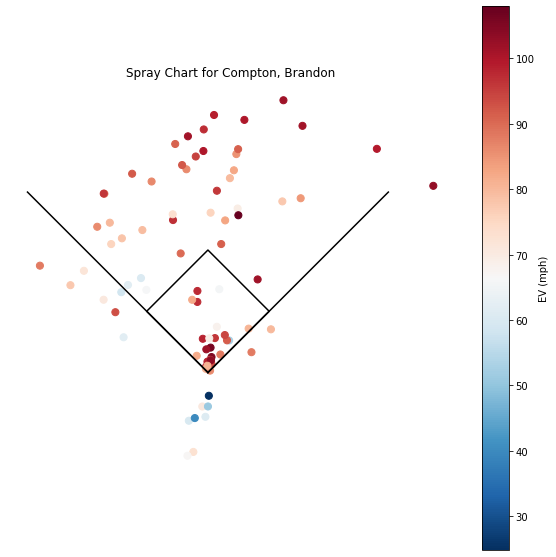

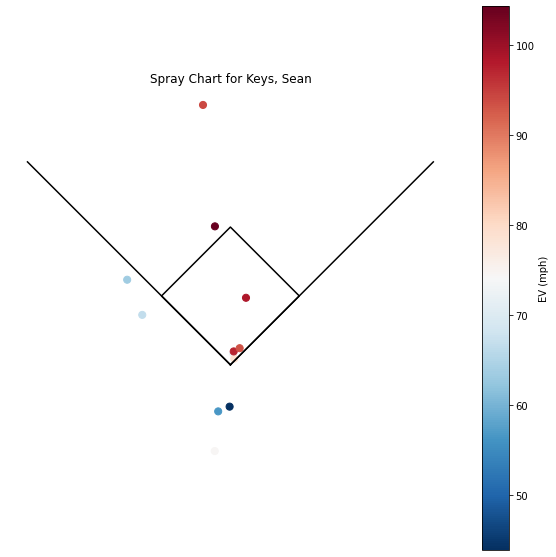

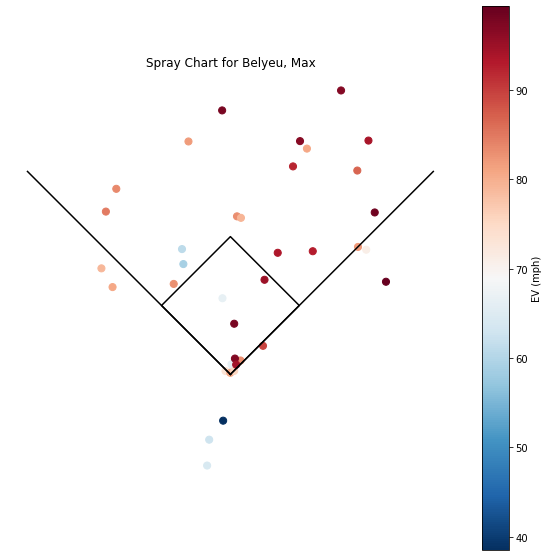

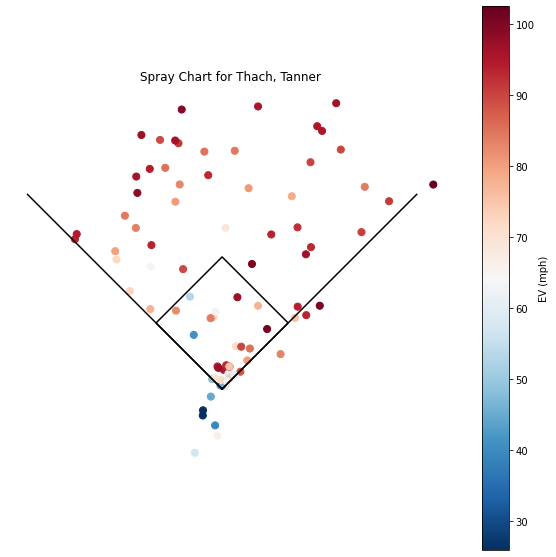

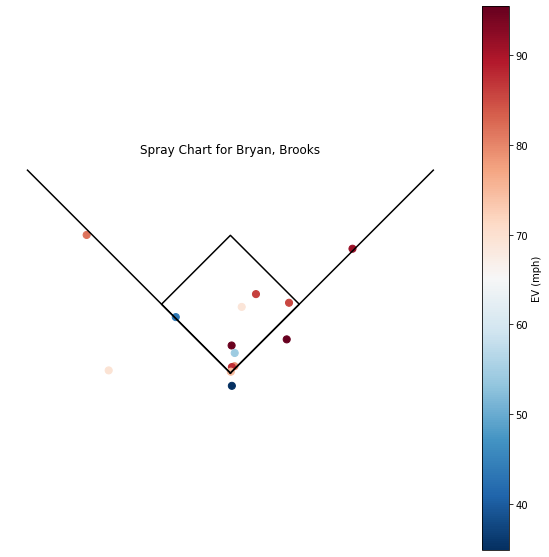

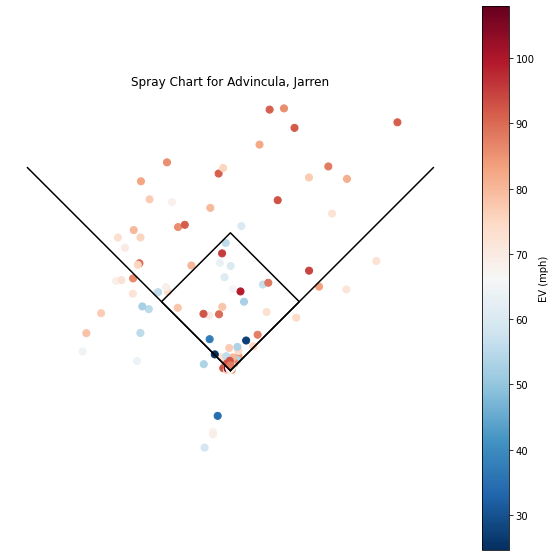

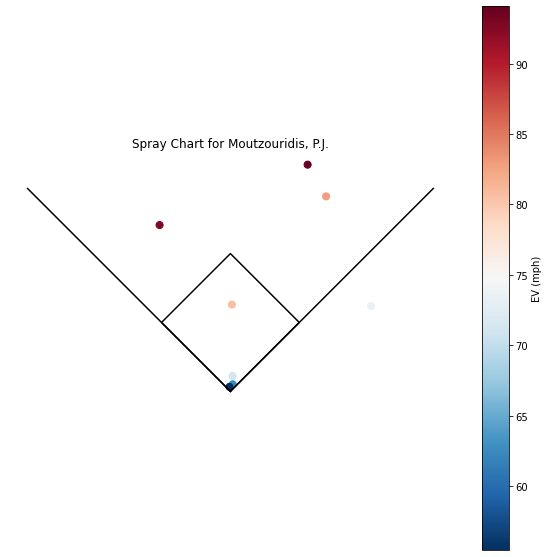

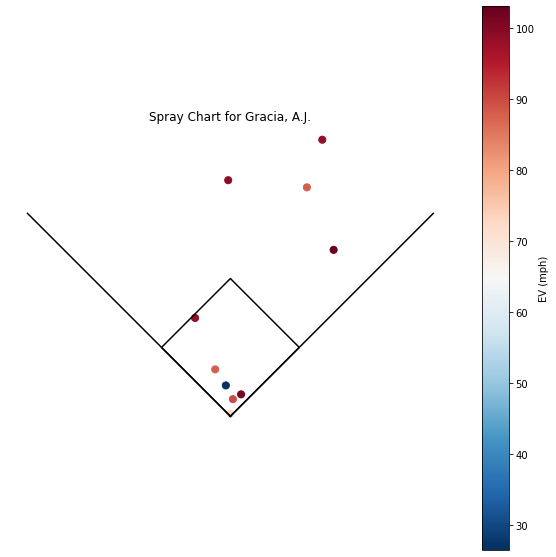

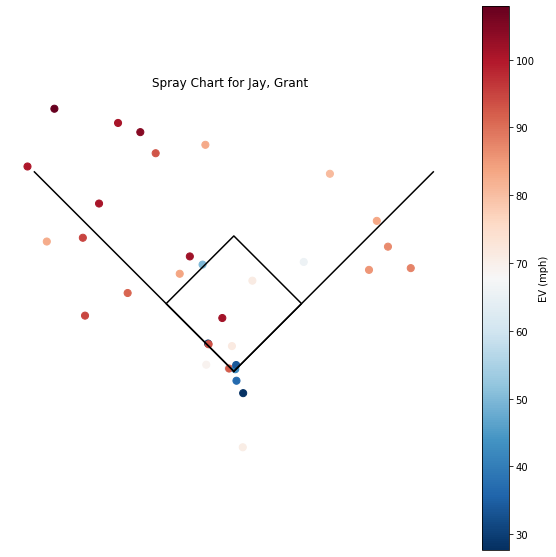

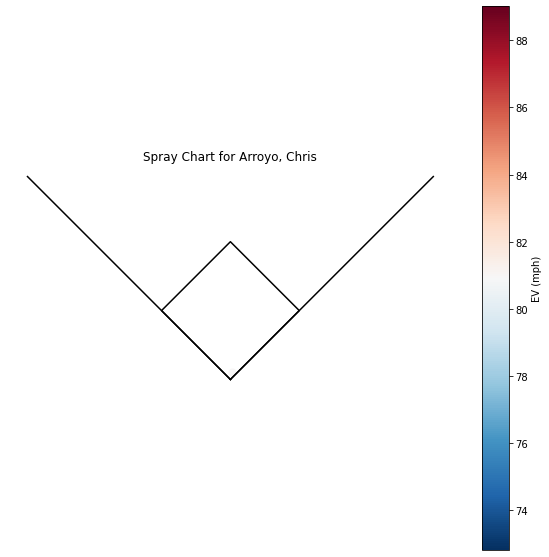

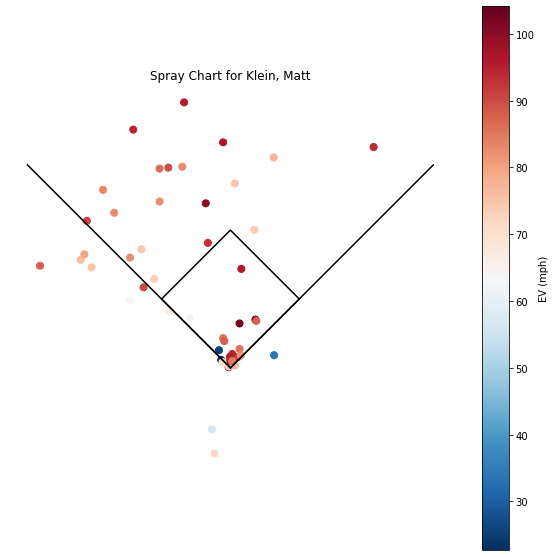

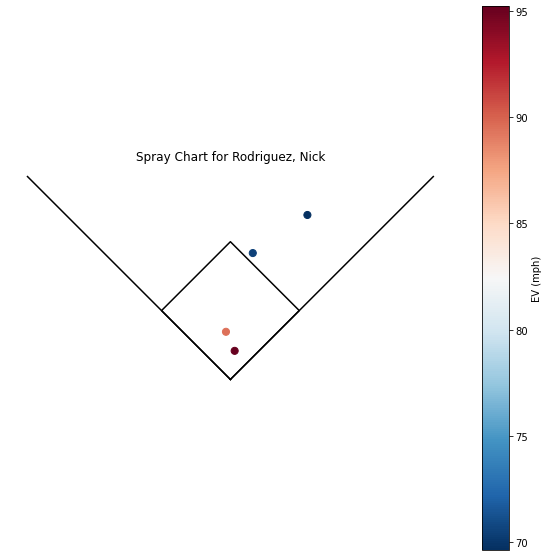

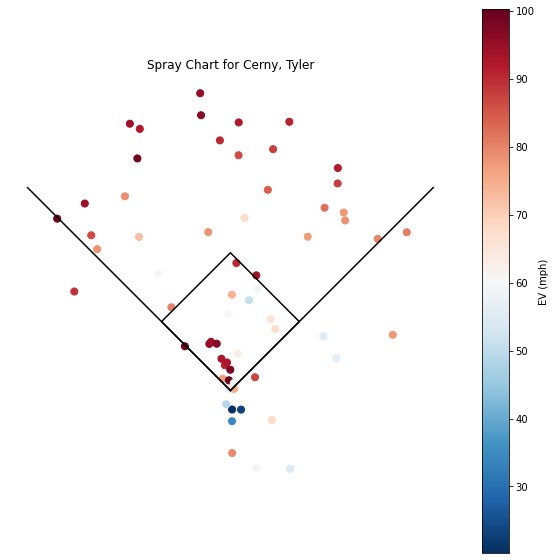

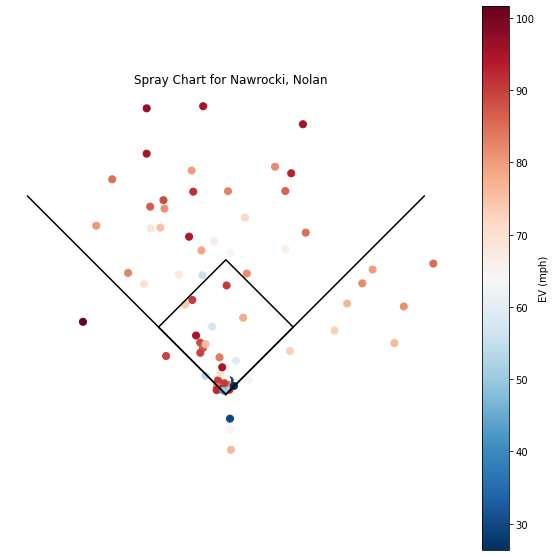

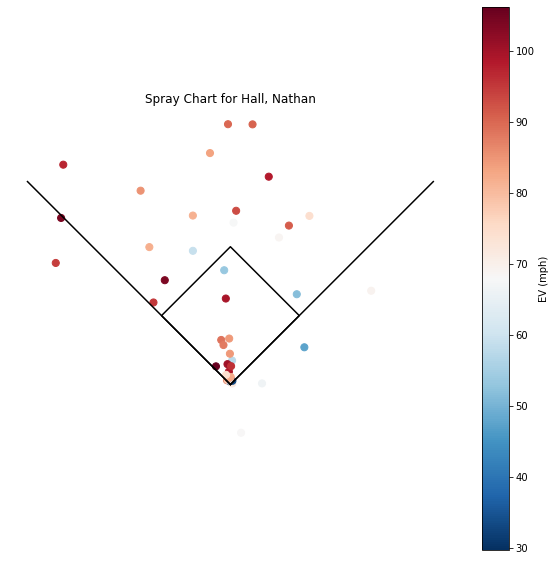

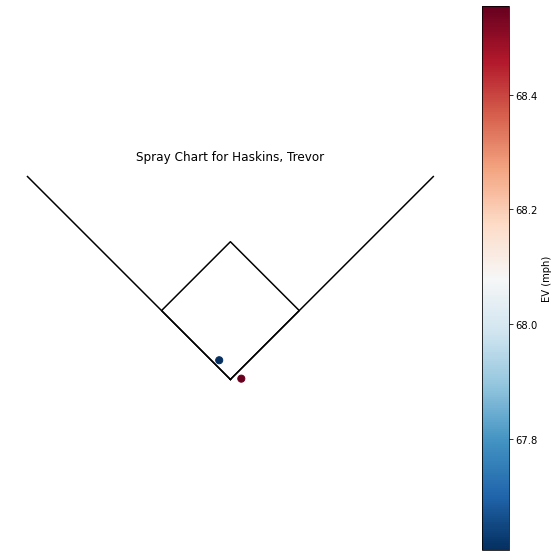

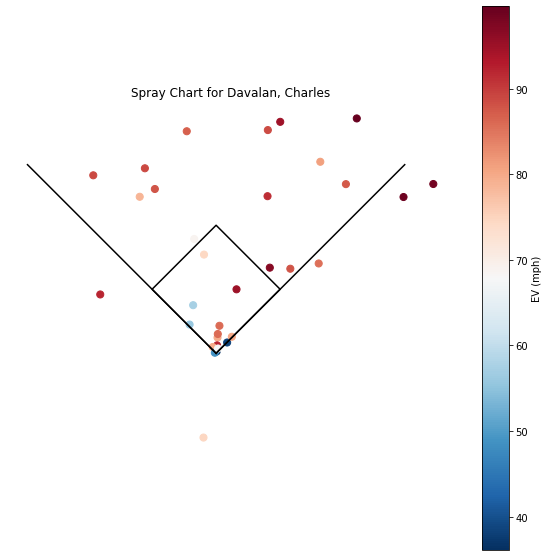

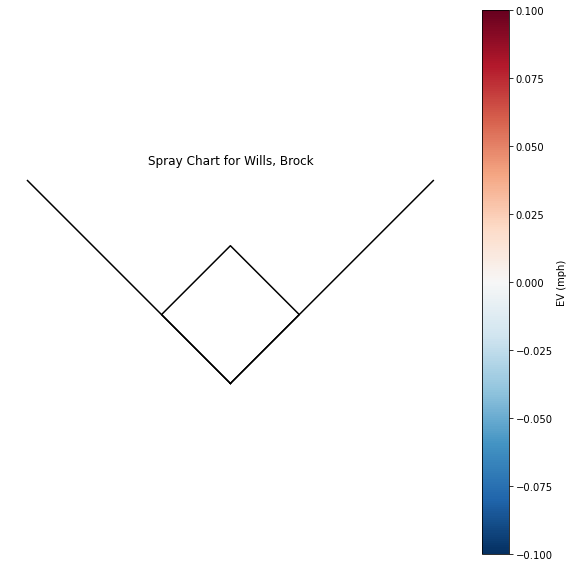

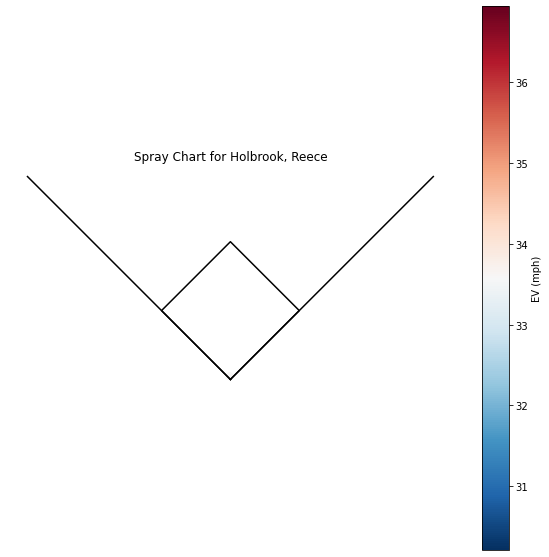

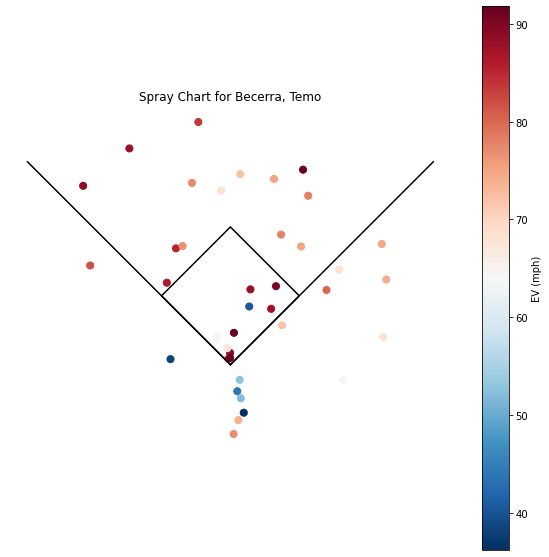

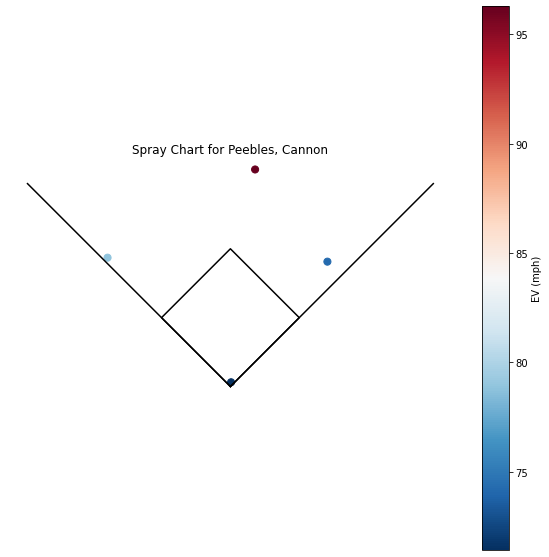

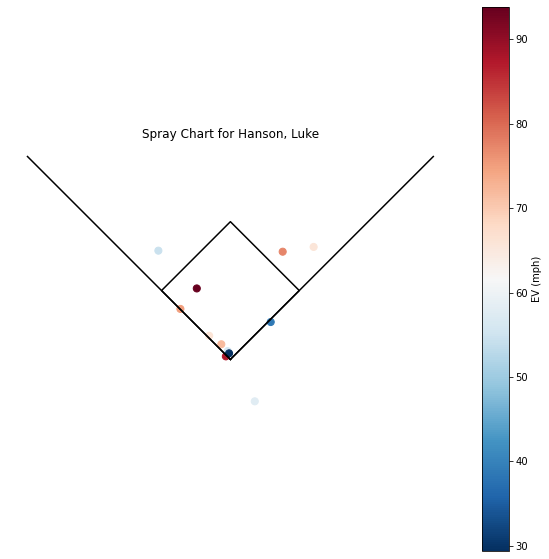

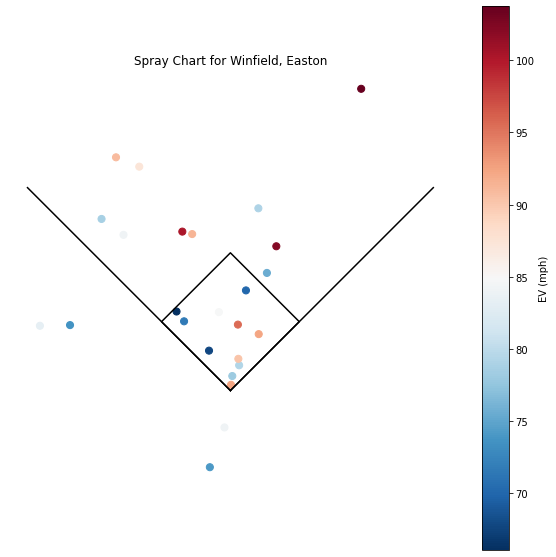

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
cape10 = pd.read_csv('/Users/anthonykeefe/Desktop/all_games.csv')

# Data cleaning and transformation
cape10 = cape10.dropna(subset=['AutoPitchType', 'HorzBreak', 'InducedVertBreak'])
cape10['swing'] = np.where(cape10['PitchCall'].isin(['InPlay', 'StrikeSwinging', 'FoulBall']), 1, 0)
cape10['whiff'] = np.where(cape10['PitchCall'] == 'StrikeSwinging', 1, 0)
cape10['Count'] = cape10['Balls'].astype(str) + ' - ' + cape10['Strikes'].astype(str)

# Calculate hc_x and hc_y
cape10['hc_x'] = np.sin(cape10['Bearing'] * np.pi / 180) * cape10['Distance']
cape10['hc_y'] = np.cos(cape10['Bearing'] * np.pi / 180) * cape10['Distance']

# Filter the dataset for WAR_GAT team
war_gat = cape10[cape10['BatterTeam'] == 'COT_KET']

# Get unique hitters
hitters = war_gat['Batter'].unique()

# Function to plot the baseball field
def plot_baseball_field(ax):
    # Baseball field coordinates (simplified)
    home_plate = [0, 0]
    first_base = [90, 90]
    second_base = [0, 180]
    third_base = [-90, 90]
    
    # Draw bases
    bases = [home_plate, first_base, second_base, third_base, home_plate]
    bases = np.array(bases)
    ax.plot(bases[:, 0], bases[:, 1], color='black')
    
    # Draw the foul lines
    fence_radius = 375
    ax.plot([0, -fence_radius * np.cos(np.pi / 4)], [0, fence_radius * np.sin(np.pi / 4)], color='black')
    ax.plot([0, fence_radius * np.cos(np.pi / 4)], [0, fence_radius * np.sin(np.pi / 4)], color='black')
    
    ax.set_aspect('equal')
    ax.axis('off')

# Generate a spray chart for each hitter
for hitter in hitters:
    hitter_data = war_gat[war_gat['Batter'] == hitter]
    
    plt.figure(figsize=(10, 10))
    sc = plt.scatter(hitter_data['hc_x'], hitter_data['hc_y'], c=hitter_data['ExitSpeed'], cmap='RdBu_r', s=50)  # s=50 for bigger dots
    cb = plt.colorbar(sc, label='EV (mph)')
    
    ax = plt.gca()
    plot_baseball_field(ax)
    
    plt.title(f'Spray Chart for {hitter}')
    plt.show()
